In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib as jb

## The usual way we inspect data

In [4]:
Teams = pd.read_excel('Documents\mira-bing\data\Teams.xlsx')
gender = pd.read_excel('Documents\mira-bing\data\EntriesGender.xlsx')

In [5]:
Teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [6]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [7]:
Teams.describe()

,Name,Discipline,NOC,Event
count,743,743,743,743
unique,146,20,84,36
top,Japan,Swimming,Japan,Men
freq,45,113,48,120


In [8]:
gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


## Merging the DataFrames

In [9]:
TbyG= Teams.merge(gender, on = 'Discipline')
TbyG

,Name,Discipline,NOC,Event,Female,Male,Total
0,Belgium,3x3 Basketball,Belgium,Men,32,32,64
1,China,3x3 Basketball,People's Republic of China,Men,32,32,64
2,China,3x3 Basketball,People's Republic of China,Women,32,32,64
3,France,3x3 Basketball,France,Women,32,32,64
4,Italy,3x3 Basketball,Italy,Women,32,32,64
...,...,...,...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women,122,146,268
739,Spain,Water Polo,Spain,Men,122,146,268
740,Spain,Water Polo,Spain,Women,122,146,268
741,United States,Water Polo,United States of America,Men,122,146,268


In [10]:
TbyG.describe()

,Female,Male,Total
count,743.000000,743.000000,743.000000
mean,238.576043,257.469717,496.045760
std,271.360939,308.524567,579.153256
min,32.000000,0.000000,64.000000
25%,90.000000,86.000000,172.000000
50%,107.000000,144.000000,234.000000
75%,361.000000,418.000000,779.000000
max,969.000000,1072.000000,2041.000000


In [11]:
TbyG.head(10)

,Name,Discipline,NOC,Event,Female,Male,Total
0,Belgium,3x3 Basketball,Belgium,Men,32,32,64
1,China,3x3 Basketball,People's Republic of China,Men,32,32,64
2,China,3x3 Basketball,People's Republic of China,Women,32,32,64
3,France,3x3 Basketball,France,Women,32,32,64
4,Italy,3x3 Basketball,Italy,Women,32,32,64
5,Japan,3x3 Basketball,Japan,Men,32,32,64
6,Japan,3x3 Basketball,Japan,Women,32,32,64
7,Latvia,3x3 Basketball,Latvia,Men,32,32,64
8,Mongolia,3x3 Basketball,Mongolia,Women,32,32,64
9,Netherlands,3x3 Basketball,Netherlands,Men,32,32,64


## But Wait! There's another way to inspect- Introducing Pandas_profiling

In [12]:
help(pandas_profiling) #https://github.com/ydataai/pandas-profiling/blob/develop/README.md

Help on package pandas_profiling:

NAME
    pandas_profiling - Main module of pandas-profiling.

DESCRIPTION
    .. include:: ../../README.md

PACKAGE CONTENTS
    config
    controller (package)
    expectations_report
    model (package)
    profile_report
    report (package)
    serialize_report
    utils (package)
    version
    visualisation (package)

SUBMODULES
    pandas_decorator

CLASSES
    pandas_profiling.expectations_report.ExpectationsReport(builtins.object)
        pandas_profiling.profile_report.ProfileReport(pandas_profiling.serialize_report.SerializeReport, pandas_profiling.expectations_report.ExpectationsReport)
    pandas_profiling.serialize_report.SerializeReport(builtins.object)
        pandas_profiling.profile_report.ProfileReport(pandas_profiling.serialize_report.SerializeReport, pandas_profiling.expectations_report.ExpectationsReport)
    
    class ProfileReport(pandas_profiling.serialize_report.SerializeReport, pandas_profiling.expectations_report.Expectat

In [13]:
TbyG.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Looking at Olympic Medals

In [14]:
Medals = pd.read_csv("Documents\mira-bing\data\Medals.csv")

In [15]:
hist_med = pd.read_csv("Documents\mira-bing\data\Summer_medals_History.csv")

In [16]:
Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,People's Republic of China,32,22,16,70,2
1,2,United States of America,25,30,22,77,1
2,3,Japan,21,7,12,40,5
3,4,Great Britain,15,18,15,48,4
4,5,Australia,15,4,17,36,6


In [18]:
hist_med.head()

,Country,Total,Golds,Silvers,Bronzes
0,USA,2297,930,728,639
1,Soviet Union,1010,395,319,296
2,Germany (includes W but not E.Germany),851,247,284,320
3,Great Britain,714,207,255,252
4,France,638,192,212,234


#### Align Order of Columns

In [17]:
cols = Medals.columns.tolist()
cols

['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Rank by Total']

In [19]:
Medals = Medals[['Team/NOC', 'Total', 'Gold', 'Silver', 'Bronze', 'Rank', 'Rank by Total']]
Medals.head()

,Team/NOC,Total,Gold,Silver,Bronze,Rank,Rank by Total
0,People's Republic of China,70,32,22,16,1,2
1,United States of America,77,25,30,22,2,1
2,Japan,40,21,7,12,3,5
3,Great Britain,48,15,18,15,4,4
4,Australia,36,15,4,17,5,6


## pair-wise plot of Medals by Country

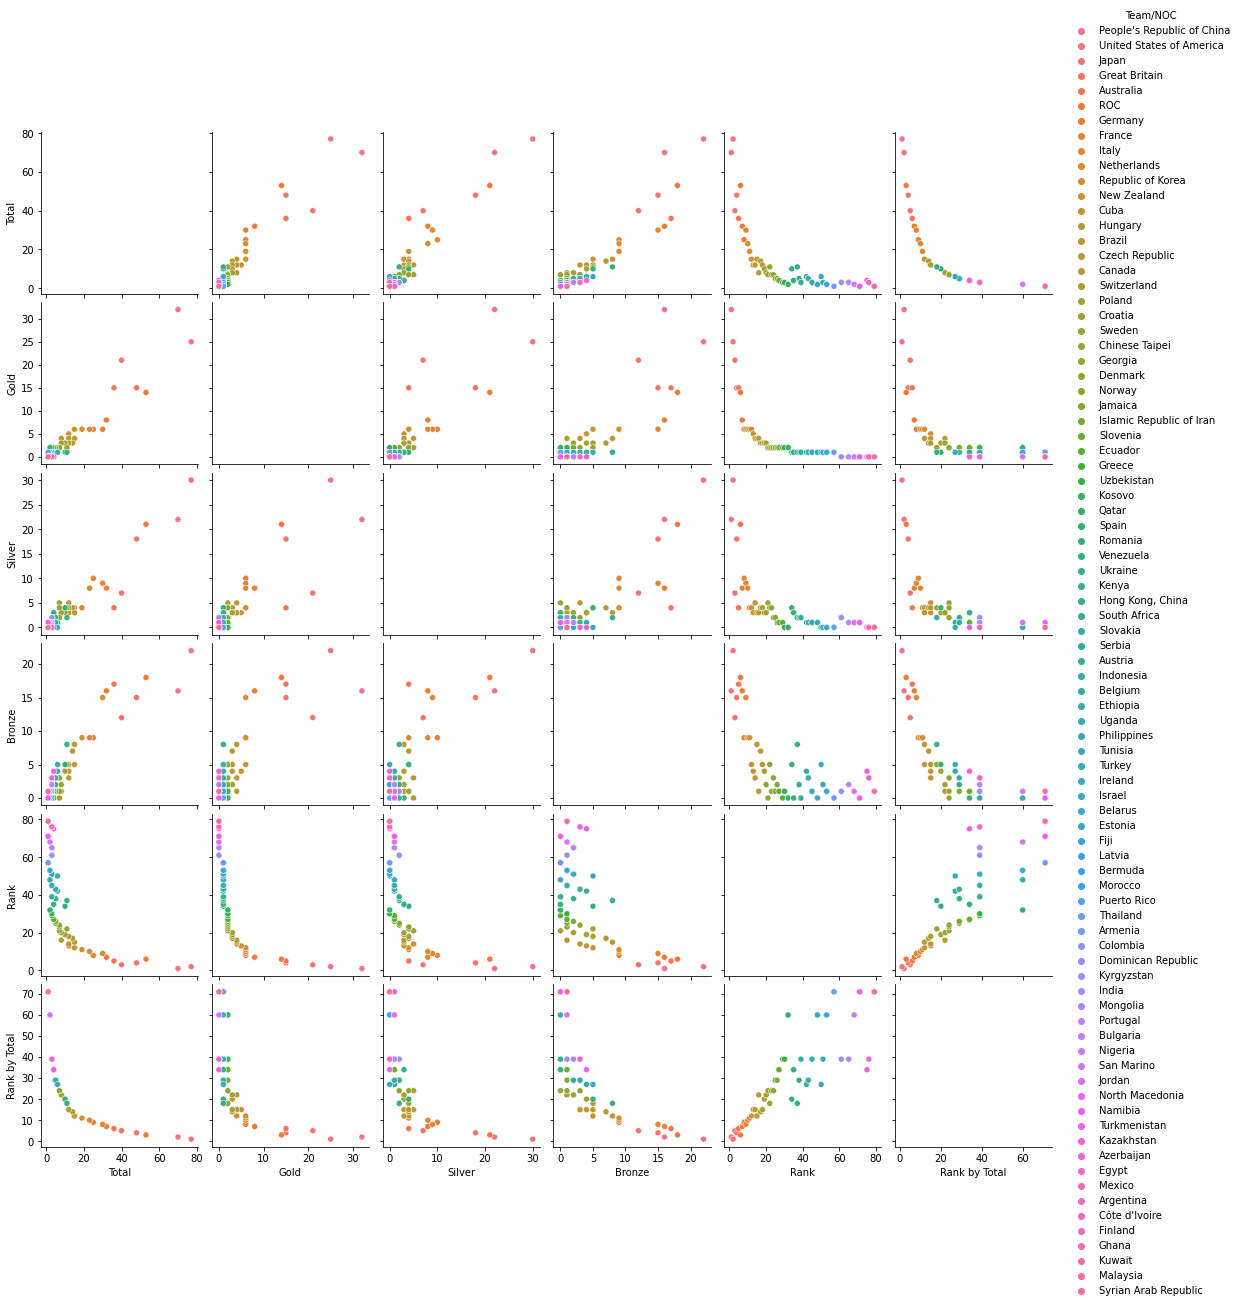

In [20]:
sns.pairplot(Medals, hue="Team/NOC", height = 2.5)

## Hypothesis:The number of medals won in a previous Olympics can predict the country most likely to have won the medals

### examining historical medal data

In [21]:
X = hist_med.drop(columns = 'Country')
y = hist_med['Country']
model = DecisionTreeClassifier()
model.fit(X, y)

# testing theory
predictions = model.predict([ [2002, 572, 780, 650], [4, 3, 0, 1] ])
predictions

array(['USA', 'Mozambique'], dtype=object)

#### so we can do it, but is it accurate?

In [22]:
from sklearn.metrics import accuracy_score
X = hist_med.drop(columns =['Country'])
y = hist_med['Country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#### Checking the accuracy at 75,25

In [23]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.8529411764705882

Note: The Historical Medal Data set is the accrued medal count over the 26 years the Summer Olympics had been held when the database was assembled. This gives us two options for finding a useful model.
1- Finding the average of the medals won over the 26 years included or
2- Multiplying the medals won in the most recent year by 26 as an estimate of how many medals are expected over 26 years.
We examined both options to evaluate performance of the models.

#### avg medals per country 

In [24]:
def divide_by_26_games(number): 
    return number/26
 
# executing the function
hist_med_avg  = hist_med[['Total', 'Golds','Silvers', 'Bronzes']].apply(divide_by_26_games)

hist_med_avg

,Total,Golds,Silvers,Bronzes
0,88.346154,35.769231,28.000000,24.576923
1,38.846154,15.192308,12.269231,11.384615
2,32.730769,9.500000,10.923077,12.307692
3,27.461538,7.961538,9.807692,9.692308
4,24.538462,7.384615,8.153846,9.000000
...,...,...,...,...
129,0.038462,0.000000,0.038462,0.000000
130,0.038462,0.000000,0.000000,0.038462
131,0.038462,0.000000,0.038462,0.000000
132,0.038462,0.038462,0.000000,0.000000


#### multiply current medals by 26

In [25]:
def multiply_by_26_games(number):
    return number *26
#executing the function
Medals_Multiplied = Medals[['Total', 'Gold', 'Silver', 'Bronze']].apply(multiply_by_26_games)
Medals_Multiplied

,Total,Gold,Silver,Bronze
0,1820,832,572,416
1,2002,650,780,572
2,1040,546,182,312
3,1248,390,468,390
4,936,390,104,442
...,...,...,...,...
80,26,0,0,26
81,26,0,0,26
82,26,0,0,26
83,26,0,0,26


## Can the number of medals won in an Olympics predict the country most likely to have won the medals?

In [33]:
X_Medals = Medals_Multiplied 
y_Medals = Medals['Team/NOC']
model_Medals_Multiplied = DecisionTreeClassifier()
model_Medals_Multiplied.fit(X_Medals, y_Medals)

# testing theory
predictions = model_Medals_Multiplied.predict([ [77,22,30,25], [4, 3, 0, 1] ])
predictions

array(['Belgium', 'Argentina'], dtype=object)

In [30]:
X = hist_med_avg
y = hist_med['Country']
model = DecisionTreeClassifier()
model.fit(X, y)

# testing theory
predictions = model.predict([ [77, 22, 30, 25], [4, 3, 0, 1] ])
predictions

array(['USA', 'Panama'], dtype=object)

## so we can do it, but is it accurate?

## Checking the accuracy at 75,25

In [41]:
from sklearn.metrics import accuracy_score 

# Training the Medals_Multiplied set
X_Medals_train, X_Medals_test, y_Medals_train, y_Medals_test = train_test_split(X_Medals, y_Medals, test_size = 0.25)

model_Medals_Multiplied.fit(X_Medals_train, y_Medals_train)

predictions = model_Medals_Multiplied.predict(X_Medals_test)

# examing the accuracy score
score = accuracy_score(y_Medals_test, predictions)
score

0.0

In [43]:
# Training the Historical Medals averaged by years
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

predictions = model.predict(X_test)

# examing the accuracy score
score = accuracy_score(y_test, predictions)
score


0.6764705882352942

### Accuracy is questionable for both models, but let's investigate what happens with the entire new Medals list as the prediction data

In [45]:
List_medals = Medals_Multiplied.values.tolist()
List_medals

[[1820, 832, 572, 416],
 [2002, 650, 780, 572],
 [1040, 546, 182, 312],
 [1248, 390, 468, 390],
 [936, 390, 104, 442],
 [1378, 364, 546, 468],
 [832, 208, 208, 416],
 [650, 156, 260, 234],
 [780, 156, 234, 390],
 [598, 156, 208, 234],
 [494, 156, 104, 234],
 [390, 156, 104, 130],
 [312, 130, 78, 104],
 [312, 104, 130, 78],
 [390, 104, 78, 208],
 [208, 104, 78, 26],
 [364, 78, 104, 182],
 [312, 78, 104, 130],
 [260, 78, 78, 104],
 [208, 78, 78, 52],
 [182, 52, 130, 0],
 [286, 52, 104, 130],
 [182, 52, 104, 26],
 [182, 52, 52, 78],
 [130, 52, 52, 26],
 [130, 52, 26, 52],
 [104, 52, 26, 26],
 [104, 52, 26, 26],
 [78, 52, 26, 0],
 [78, 52, 0, 26],
 [78, 52, 0, 26],
 [52, 52, 0, 0],
 [52, 52, 0, 0],
 [260, 26, 104, 130],
 [104, 26, 78, 0],
 [104, 26, 78, 0],
 [286, 26, 52, 208],
 [130, 26, 52, 52],
 [78, 26, 52, 0],
 [78, 26, 52, 0],
 [78, 26, 52, 0],
 [156, 26, 26, 104],
 [130, 26, 26, 78],
 [130, 26, 26, 78],
 [78, 26, 26, 26],
 [78, 26, 26, 26],
 [78, 26, 26, 26],
 [52, 26, 26, 0],
 [52,

### Multiplied Medals prediction

In [46]:
model_Medals_Multiplied = DecisionTreeClassifier()
model_Medals_Multiplied.fit(X_Medals_train, y_Medals_train)

# testing theory
predictions = model_Medals_Multiplied.predict(List_medals)
predictions

array(["People's Republic of China", 'United States of America', 'Japan',
       "People's Republic of China", 'Australia',
       "People's Republic of China", "People's Republic of China",
       'France', "People's Republic of China", 'Netherlands',
       'Republic of Korea', 'New Zealand', 'Brazil', 'New Zealand',
       'Brazil', 'Czech Republic', 'New Zealand', 'New Zealand',
       'Croatia', 'Croatia', 'Sweden', 'Chinese Taipei', 'Chinese Taipei',
       'Denmark', 'Denmark', 'Slovenia', 'Slovenia', 'Slovenia', 'Greece',
       'Greece', 'Greece', 'Greece', 'Greece', 'Spain', 'Romania',
       'Romania', 'Serbia', 'Kenya', 'South Africa', 'South Africa',
       'South Africa', 'Serbia', 'Austria', 'Austria', 'Ethiopia',
       'Ethiopia', 'Ethiopia', 'Philippines', 'Philippines', 'Serbia',
       'Israel', 'Israel', 'Belarus', 'Belarus', 'Belarus', 'Belarus',
       'Bermuda', 'Bermuda', 'Bermuda', 'Bermuda', 'Colombia', 'Colombia',
       'Colombia', 'Colombia', 'Mongolia', '

### Averaged Historical Medals 

In [48]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# testing theory
predictions = model.predict(List_medals)
predictions

array(['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
       'USA', 'USA', 'Peru', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
       'USA', 'Peru', 'Panama', 'Panama', 'Mozambique', 'Mozambique',
       'USA', 'Peru', 'Peru', 'USA', 'USA', 'Peru', 'Peru', 'Peru', 'USA',
       'USA', 'USA', 'USA', 'USA', 'USA', 'Peru', 'Peru', 'Panama',
       'Panama', 'Panama', 'Panama', 'Panama', 'Panama', 'Panama',
       'Mozambique', 'Mozambique', 'Mozambique', 'Mozambique',
       'Trinidad & Tobago', 'Trinidad & Tobago', 'Trinidad & Tobago',
       'Trinidad & Tobago', 'Trinidad & Tobago', 'Trinidad & Tobago',
       'Trinidad & Tobago', 'Trinidad & Tobago', 'Trinidad & Tobago',
       'Trinidad & Tobago', 'Namibia', 'Namibia', 'Namibia', 'Namibia',
       'Qatar', 'Qatar', 'Qatar', 'Qatar', 'Qatar', 'Qatar', 'Qatar',
       'Qatar', 'Qatar', 'Qatar', 'Qatar'], dtype=object)